# Capstone-1
# Phase-1 Inventory profiling

# Author - Thanish

# Version - 0.2

# Date - June 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
final_data=pd.read_csv(r"C:\Users\Thanish-REVA\Desktop\Reva\Trim-2\Capstone Project -1\Development_Code\phase-2\final_data_v1.csv")

In [3]:
final_data.head()

,Unnamed: 0,TM Fiscal Year,Month Name,Month,Partner Type,Dealer,Dealer Code,Division,Region,JC #,...,TM Part Indicator,Sold Qty,TM Spares Amount,Spares Amount,PPL,PL,LOB,Invoice Status,Invoice Number,Invoice Date
0,0,2022-23,April,2022 / 04,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-006244,...,Y,1,179.66102,179.66102,Nano,Nano CX,Small Cars,New,IATIEN2223001268,2022-04-25
1,1,2022-23,April,2022 / 04,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-006244,...,Y,1,10432.20340,10432.20340,Nano,Nano CX,Small Cars,New,IATIEN2223001268,2022-04-25
2,2,2022-23,April,2022 / 04,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-006244,...,Y,1,256.25000,256.25000,Nano,Nano CX,Small Cars,New,IATIEN2223001268,2022-04-25
3,3,2022-23,April,2022 / 04,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-006244,...,Y,1,9475.00000,9475.00000,Nano,Nano CX,Small Cars,New,IATIEN2223001268,2022-04-25
4,4,2022-23,April,2022 / 04,Dealer,ADISHAKTI CARS PVT LTD-3007720,3007720,3007720-Sv&Pa-Bengaluru-AtiCar,South1,JC-AtiCar-BP1-2122-006244,...,Y,1,561.71875,561.71875,Nano,Nano CX,Small Cars,New,IATIEN2223001268,2022-04-25


In [4]:
# Total unique count of parts
len(final_data['Part No'].value_counts())

3785

In [103]:
final_data['Part No'].value_counts()

Part No
8855WORK0112      17870
270240109986       7725
571518130101       7520
8855BRFL0001S      5945
G8855WORK0049P     5888
                  ...  
580927600105          1
580927000101          1
571850105832          1
571520120109          1
570718175302          1
Name: count, Length: 3785, dtype: int64

### Total unique parts count - 3785
### No of Records - 237566

# Inventory Profiling
# 1. ABC classification

In [5]:
# # ABC Classification by Item’s Revenue Contibution to Total

In [6]:
# feature engineering for ABC classification

# Remove columns that are not required
# TM Spares Amount/ Spares Amount can be considered as Revenue for each transaction
# convert “InvoiceDate” column to datetime and extract year and month


In [7]:
# ABC Classification by Item’s Revenue Contibution to Total

# sort items in descending order so the highest revenue-generating item will be at the top of the dataframe.

In [8]:
final_data.columns

Index(['Unnamed: 0', 'TM Fiscal Year', 'Month Name', 'Month', 'Partner Type',
       'Dealer', 'Dealer Code', 'Division', 'Region', 'JC #',
       'Job Card Created Date', 'JC Open Days', 'Job Card Closed Date',
       'Service Type', 'KMs Run', 'Part No', 'Part Desc', 'Category',
       'TM Part Indicator', 'Sold Qty', 'TM Spares Amount', 'Spares Amount',
       'PPL', 'PL', 'LOB', 'Invoice Status', 'Invoice Number', 'Invoice Date'],
      dtype='object')

In [9]:
abc_data=final_data[['Month Name','Month','Part No','Part Desc','Category','Sold Qty','Spares Amount','PPL','Invoice Number','Invoice Date']]

In [10]:
abc_data

,Month Name,Month,Part No,Part Desc,Category,Sold Qty,Spares Amount,PPL,Invoice Number,Invoice Date
0,April,2022 / 04,287054509931,AILGATE_SWITCH,Spare Part,1,179.66102,Nano,IATIEN2223001268,2022-04-25
1,April,2022 / 04,543854400158,"HEADLAMP ASSY WITH CELAR LENS,LH",Spare Part,1,10432.20340,Nano,IATIEN2223001268,2022-04-25
2,April,2022 / 04,543855106316,MASCOT,Spare Part,1,256.25000,Nano,IATIEN2223001268,2022-04-25
3,April,2022 / 04,54387420010330,CED TAILGATE ASSY SHELL COMPLETE WITH WI,Spare Part,1,9475.00000,Nano,IATIEN2223001268,2022-04-25
4,April,2022 / 04,543874200124,"COVER ASSY,T/G PULL CUP WITH TOUCH PAD",Spare Part,1,561.71875,Nano,IATIEN2223001268,2022-04-25
...,...,...,...,...,...,...,...,...,...,...
237561,May,2024 / 05,279018130106,ASSY.OIL FILTER-TC,Spare Part,1,179.66102,Nexon,IATIAD2425001090,2024-05-31
237562,May,2024 / 05,285326307701,"OIL SEAL (RH DRIVE SHAFT),SKF",Spare Part,1,176.27119,Nexon,IATIAD2425001090,2024-05-31
237563,May,2024 / 05,285326307702,"OIL SEAL (LH-DRIVESHAFT),SKF",Spare Part,1,240.67797,Nexon,IATIAD2425001090,2024-05-31
237564,May,2024 / 05,543883403601,POLLEN FILTER,Spare Part,1,345.31250,Nexon,IATIAD2425001090,2024-05-31


In [11]:
abc_data = abc_data.rename(columns={'Month': 'year_month'})
abc_data = abc_data.rename(columns={'Spares Amount': 'revenue_per_part'})

In [12]:
abc_data['Invoice Date'] = pd.to_datetime(abc_data['Invoice Date'])

In [13]:
abc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237566 entries, 0 to 237565
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Month Name        237566 non-null  object        
 1   year_month        237566 non-null  object        
 2   Part No           237566 non-null  object        
 3   Part Desc         237566 non-null  object        
 4   Category          237566 non-null  object        
 5   Sold Qty          237566 non-null  int64         
 6   revenue_per_part  237566 non-null  float64       
 7   PPL               237566 non-null  object        
 8   Invoice Number    237566 non-null  object        
 9   Invoice Date      237566 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 18.1+ MB


In [14]:
abc_data['year'] = pd.DatetimeIndex(abc_data['Invoice Date']).year
abc_data['month'] = pd.DatetimeIndex(abc_data['Invoice Date']).month

In [15]:
# new dataframe with part no, year-month and revenue
abc_data_2=abc_data.groupby(['Part No','year','month','year_month'])['revenue_per_part'].sum().to_frame().reset_index()

In [16]:
abc_data_2['year_month'] = abc_data_2['year_month'].str.replace(' / ', '/')

In [17]:
# Do pivot to year_month being the column and part no as index

In [18]:
abc_pivot_data=abc_data_2.pivot(index='Part No',columns='year_month', values='revenue_per_part').reset_index().fillna(0)

In [19]:
abc_pivot_data

year_month,Part No,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08,2022/09,...,2023/11,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06,2024/07,2024/08
0,00SP1000870I,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0
1,11071710400,0.0,0.0,0.0,0.0,0.0,0.0,25.00000,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,142.50000,95.0000,0.00000,0.0
2,11073510858,0.0,0.0,0.0,0.0,0.0,0.0,27.34375,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0
3,11073596094,0.0,0.0,0.0,0.0,0.0,0.0,27.96610,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0
4,11073710458,0.0,0.0,0.0,0.0,0.0,0.0,18.75000,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,150.00000,0.00000,0.0000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,K68370775AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,2961.5625,4556.25,1518.75,1518.75,0.00000,0.00000,3037.50000,7441.8750,16402.50000,10327.5
3781,K68370779AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0
3782,K68381654AC,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0000,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0
3783,K68535103AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0000,0.00,0.00,0.00,54829.68747,0.00000,0.00000,0.0000,0.00000,0.0


In [20]:
# Calculate total sales

In [21]:
abc_pivot_data['total_sales'] = abc_pivot_data.iloc[:,1:].sum(axis=1,numeric_only=True)

In [22]:
abc_pivot_data

year_month,Part No,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08,2022/09,...,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06,2024/07,2024/08,total_sales
0,00SP1000870I,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,185.937500
1,11071710400,0.0,0.0,0.0,0.0,0.0,0.0,25.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,142.50000,95.0000,0.00000,0.0,312.500000
2,11073510858,0.0,0.0,0.0,0.0,0.0,0.0,27.34375,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,27.343750
3,11073596094,0.0,0.0,0.0,0.0,0.0,0.0,27.96610,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,27.966100
4,11073710458,0.0,0.0,0.0,0.0,0.0,0.0,18.75000,0.0,0.0,...,0.00,0.00,0.00,0.00000,150.00000,0.00000,0.0000,0.00000,0.0,281.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,K68370775AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,4556.25,1518.75,1518.75,0.00000,0.00000,3037.50000,7441.8750,16402.50000,10327.5,71685.000000
3781,K68370779AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,2049.218750
3782,K68381654AC,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,234662.499880
3783,K68535103AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,54829.68747,0.00000,0.00000,0.0000,0.00000,0.0,420360.937260


In [23]:
abc_pivot_data['total_sales']=abc_pivot_data['total_sales'].round(2)
abc_pivot_data

year_month,Part No,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08,2022/09,...,2023/12,2024/01,2024/02,2024/03,2024/04,2024/05,2024/06,2024/07,2024/08,total_sales
0,00SP1000870I,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,185.94
1,11071710400,0.0,0.0,0.0,0.0,0.0,0.0,25.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,142.50000,95.0000,0.00000,0.0,312.50
2,11073510858,0.0,0.0,0.0,0.0,0.0,0.0,27.34375,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,27.34
3,11073596094,0.0,0.0,0.0,0.0,0.0,0.0,27.96610,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,27.97
4,11073710458,0.0,0.0,0.0,0.0,0.0,0.0,18.75000,0.0,0.0,...,0.00,0.00,0.00,0.00000,150.00000,0.00000,0.0000,0.00000,0.0,281.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,K68370775AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,4556.25,1518.75,1518.75,0.00000,0.00000,3037.50000,7441.8750,16402.50000,10327.5,71685.00
3781,K68370779AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,2049.22
3782,K68381654AC,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.0000,0.00000,0.0,234662.50
3783,K68535103AA,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.00,0.00,0.00,54829.68747,0.00000,0.00000,0.0000,0.00000,0.0,420360.94


In [24]:
df_abc=abc_pivot_data[['Part No','total_sales']].sort_values(by='total_sales', ascending=False).reset_index()

In [25]:
df_abc

year_month,index,Part No,total_sales
0,3574,8855COOL210S,3220097.75
1,3493,8855AXLT0032,3047836.69
2,1062,541242990154,2612752.31
3,3499,8855AXLT0072,1841218.50
4,167,270240109986,1803431.36
...,...,...,...
3780,2958,570220125301,13.22
3781,3051,570718175302,11.86
3782,280,278920125310,8.05
3783,279,278920125306,8.05


In [26]:
# Calculate cumulative/running sum of each SKU and running percentage.

In [27]:
df_abc['rev_cum_sum'] = df_abc['total_sales'].cumsum()
df_abc['rev_all'] = df_abc['total_sales'].sum()
df_abc['cumulative%'] =  df_abc['rev_cum_sum'].astype('float')/df_abc['total_sales'].sum().astype('float')

In [28]:
# Run the code for float values
pd.options.display.float_format = '{:.4f}'.format

In [29]:
df_abc

year_month,index,Part No,total_sales,rev_cum_sum,rev_all,cumulative%
0,3574,8855COOL210S,3220097.7500,3220097.7500,190010261.6800,0.0169
1,3493,8855AXLT0032,3047836.6900,6267934.4400,190010261.6800,0.0330
2,1062,541242990154,2612752.3100,8880686.7500,190010261.6800,0.0467
3,3499,8855AXLT0072,1841218.5000,10721905.2500,190010261.6800,0.0564
4,167,270240109986,1803431.3600,12525336.6100,190010261.6800,0.0659
...,...,...,...,...,...,...
3780,2958,570220125301,13.2200,190010228.6400,190010261.6800,1.0000
3781,3051,570718175302,11.8600,190010240.5000,190010261.6800,1.0000
3782,280,278920125310,8.0500,190010248.5500,190010261.6800,1.0000
3783,279,278920125306,8.0500,190010256.6000,190010261.6800,1.0000


In [30]:
# ABC function

def classify_abc(x):
 if x>0 and x<=0.80:
       return "A"
 elif x>0.80 and x<=0.90:
       return "B"
 else:
       return 'C'

In [31]:
df_abc['ABC_Class']=df_abc['cumulative%'].apply(classify_abc)

In [32]:
df_abc

year_month,index,Part No,total_sales,rev_cum_sum,rev_all,cumulative%,ABC_Class
0,3574,8855COOL210S,3220097.7500,3220097.7500,190010261.6800,0.0169,A
1,3493,8855AXLT0032,3047836.6900,6267934.4400,190010261.6800,0.0330,A
2,1062,541242990154,2612752.3100,8880686.7500,190010261.6800,0.0467,A
3,3499,8855AXLT0072,1841218.5000,10721905.2500,190010261.6800,0.0564,A
4,167,270240109986,1803431.3600,12525336.6100,190010261.6800,0.0659,A
...,...,...,...,...,...,...,...
3780,2958,570220125301,13.2200,190010228.6400,190010261.6800,1.0000,C
3781,3051,570718175302,11.8600,190010240.5000,190010261.6800,1.0000,C
3782,280,278920125310,8.0500,190010248.5500,190010261.6800,1.0000,C
3783,279,278920125306,8.0500,190010256.6000,190010261.6800,1.0000,C


In [33]:
df_abc['ABC_Class'].value_counts()

ABC_Class
C    2865
A     519
B     401
Name: count, dtype: int64

In [34]:
df_abc['ABC_Class'].value_counts()/df_abc['ABC_Class'].count()

ABC_Class
C   0.7569
A   0.1371
B   0.1059
Name: count, dtype: float64

In [35]:
df_abc.groupby('ABC_Class')['total_sales'].sum()

ABC_Class
A   151936472.5200
B    19057487.2600
C    19016301.9000
Name: total_sales, dtype: float64

In [36]:
df_abc['total_sales'].sum()

190010261.68

### Total sales - 19cr¶
### Out of which parts 13% of parts belonging to A cat contributes 80% of the total sales - 15cr
### 10% Parts belonging to B cat contributes 2cr of total sales
### 75% parts belonging to C cat contributes 2cr of total sales

# XYZ classification

In [37]:

xyz_data = final_data[['Month Name','Month','Part No','Part Desc','Category','Sold Qty',
                       'Spares Amount','PPL','Invoice Number','Invoice Date']].copy()

In [38]:
xyz_data['Invoice Date'] = pd.to_datetime(xyz_data['Invoice Date'])
xyz_data['year'] = xyz_data['Invoice Date'].dt.year
xyz_data['month'] = xyz_data['Invoice Date'].dt.month
xyz_data['year_month'] = xyz_data['Invoice Date'].dt.strftime('%Y-%m') 

In [39]:
liquid_pattern = r'L\)|L \)|LX|L-\d|-L \d|GMSX'
xyz_data['liquid_flag'] = xyz_data['Part Desc'].str.contains(liquid_pattern, regex=True).astype(int)

In [40]:
xyz_data.head()

,Month Name,Month,Part No,Part Desc,Category,Sold Qty,Spares Amount,PPL,Invoice Number,Invoice Date,year,month,year_month,liquid_flag
0,April,2022 / 04,287054509931,AILGATE_SWITCH,Spare Part,1,179.6610,Nano,IATIEN2223001268,2022-04-25,2022,4,2022-04,0
1,April,2022 / 04,543854400158,"HEADLAMP ASSY WITH CELAR LENS,LH",Spare Part,1,10432.2034,Nano,IATIEN2223001268,2022-04-25,2022,4,2022-04,0
2,April,2022 / 04,543855106316,MASCOT,Spare Part,1,256.2500,Nano,IATIEN2223001268,2022-04-25,2022,4,2022-04,0
3,April,2022 / 04,54387420010330,CED TAILGATE ASSY SHELL COMPLETE WITH WI,Spare Part,1,9475.0000,Nano,IATIEN2223001268,2022-04-25,2022,4,2022-04,0
4,April,2022 / 04,543874200124,"COVER ASSY,T/G PULL CUP WITH TOUCH PAD",Spare Part,1,561.7188,Nano,IATIEN2223001268,2022-04-25,2022,4,2022-04,0


In [41]:
xyz_data['Sold Qty'] = np.where(
    xyz_data['liquid_flag'] == 1,
    xyz_data['Sold Qty'] / 1000.0,
    xyz_data['Sold Qty'].astype(float)
)

In [42]:
xyz_monthly_agg = xyz_data.groupby(['Part No', 'year_month'])['Sold Qty'].sum().reset_index()

In [43]:
xyz_monthly_agg

,Part No,year_month,Sold Qty
0,00SP1000870I,2023-05,3.0000
1,00SP1000870I,2023-06,1.0000
2,00SP1000870I,2023-07,2.0000
3,11071710400,2022-07,1.0000
4,11071710400,2023-01,2.0000
...,...,...,...
34876,K68602170AA,2024-03,4.0000
34877,K68602170AA,2024-04,3.0000
34878,K68602170AA,2024-05,5.0000
34879,K68602170AA,2024-06,2.0000


In [44]:
xyz_pivot = xyz_monthly_agg.pivot(index='Part No', columns='year_month', values='Sold Qty').fillna(0)

In [45]:
xyz_pivot['total_qty_sold'] = xyz_pivot.iloc[:,1:].sum(axis=1)
xyz_pivot['std_demand'] = xyz_pivot.iloc[:,0:32].std(axis=1)
xyz_pivot['average_demand'] = xyz_pivot.iloc[:,0:32].mean(axis=1)

In [46]:
xyz_pivot

year_month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,...,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,total_qty_sold,std_demand,average_demand
Part No,,,,,,,,,,,,,,,,,,,,,
00SP1000870I,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.6445,0.1875
11071710400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,6.0000,4.0000,0.0000,0.0000,13.0000,1.2916,0.4062
11073510858,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312
11073596094,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312
11073710458,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000,15.0000,1.5654,0.4688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K68370775AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,2.0000,5.0000,11.0000,7.0000,48.0000,2.5016,1.5000
K68370779AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312
K68381654AC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.2459,0.0625


In [47]:
#  Coefficient of Variation
xyz_pivot['cov_demand'] = xyz_pivot['std_demand'] / xyz_pivot['average_demand'].replace(0, np.nan)
xyz_pivot = xyz_pivot.replace([np.inf, -np.inf], np.nan).dropna(subset=['cov_demand'])

In [48]:
# Step 5: XYZ classification based on CoV thresholds
def classify_xyz(cov):
    if cov <= 0.5:
        return 'X'
    elif cov <= 1.0:
        return 'Y'
    else:
        return 'Z'

In [49]:
xyz_pivot['xyz_class'] = xyz_pivot['cov_demand'].apply(classify_xyz)

In [50]:
xyz_pivot = xyz_pivot.reset_index()

In [51]:
xyz_pivot

year_month,Part No,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2024-04,2024-05,2024-06,2024-07,2024-08,total_qty_sold,std_demand,average_demand,cov_demand,xyz_class
0,00SP1000870I,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.6445,0.1875,3.4371,Z
1,11071710400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,6.0000,4.0000,0.0000,0.0000,13.0000,1.2916,0.4062,3.1794,Z
2,11073510858,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312,5.6569,Z
3,11073596094,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312,5.6569,Z
4,11073710458,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,8.0000,0.0000,0.0000,0.0000,0.0000,15.0000,1.5654,0.4688,3.3396,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,K68370775AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,2.0000,5.0000,11.0000,7.0000,48.0000,2.5016,1.5000,1.6677,Z
3781,K68370779AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1768,0.0312,5.6569,Z
3782,K68381654AC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.2459,0.0625,3.9350,Z
3783,K68535103AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,1.0776,0.2500,4.3105,Z


In [52]:
#  Summary Table
summary = xyz_pivot.groupby('xyz_class').agg(
    total_skus=('xyz_class', 'count'),
    total_demand=('total_qty_sold', 'sum'),
    avg_std_dev=('std_demand', 'mean'),
    avg_demand=('average_demand', 'mean'),
    avg_cov_demand=('cov_demand', 'mean')
).reset_index()


In [53]:
summary

,xyz_class,total_skus,total_demand,avg_std_dev,avg_demand,avg_cov_demand
0,X,91,397002.6740,51.0805,139.5429,0.3852
1,Y,413,77525.2370,4.2696,6.0145,0.7714
2,Z,3281,138148.0240,3.2425,1.3471,3.1403


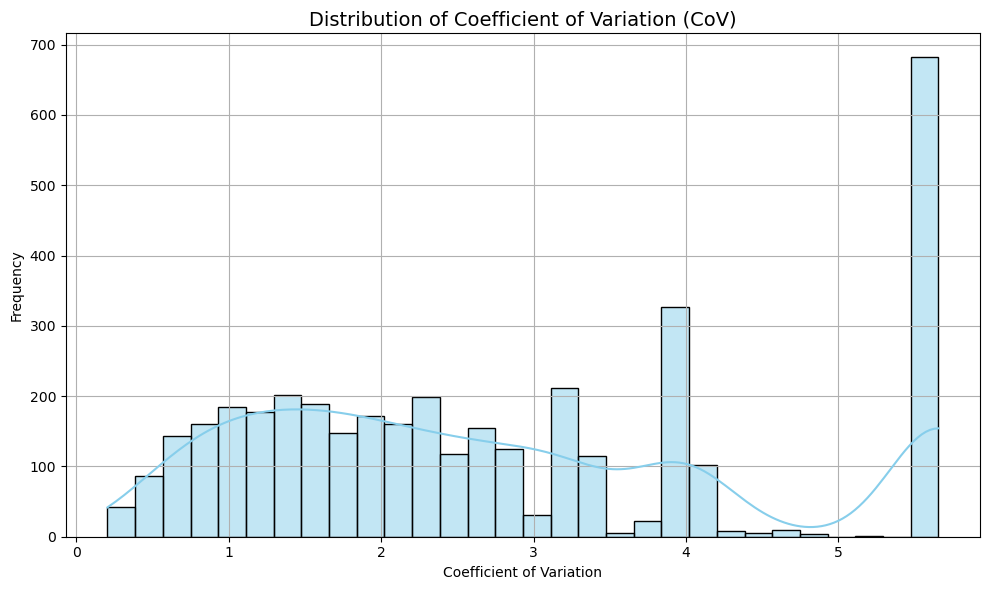

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(xyz_pivot['cov_demand'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Coefficient of Variation (CoV)', fontsize=14)
plt.xlabel('Coefficient of Variation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

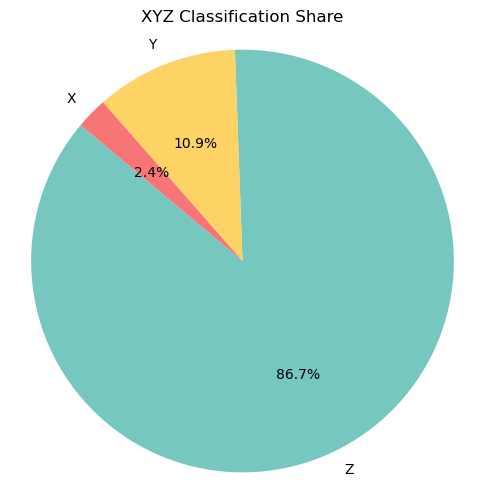

In [55]:
plt.figure(figsize=(6, 6))
xyz_counts = xyz_pivot['xyz_class'].value_counts()
plt.pie(xyz_counts, labels=xyz_counts.index, autopct='%1.1f%%', startangle=140, colors=['#76c7c0', '#fdd365', '#f77575'])
plt.title('XYZ Classification Share')
plt.axis('equal')
plt.show()

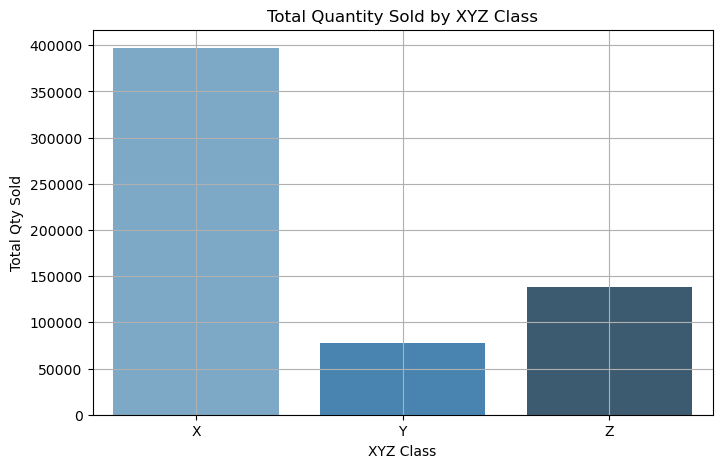

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='xyz_class', y='total_demand', palette='Blues_d')
plt.title('Total Quantity Sold by XYZ Class')
plt.ylabel('Total Qty Sold')
plt.xlabel('XYZ Class')
plt.grid(True)
plt.show()

In [57]:
# Ensure all columns are string type
xyz_pivot.columns = xyz_pivot.columns.map(str)

# Identify month columns using regex
date_columns = [col for col in xyz_pivot.columns if re.match(r'\d{4}[-/]\d{2}', col)]

# Group and summarize
df_monthly = xyz_pivot.groupby('xyz_class')[date_columns].sum().reset_index()



In [58]:
df_monthly

year_month,xyz_class,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08
0,X,9346.1770,7805.5580,10032.8030,11536.0650,13762.5240,15917.8880,11612.6730,8840.3330,9056.4310,...,15297.8860,21418.5700,17471.7440,14535.4300,16004.1790,12639.2010,9918.3670,12046.5600,15775.9710,12633.2650
1,Y,1962.2590,2036.4520,2208.8780,2189.2980,2576.4770,2595.2000,2157.1130,1832.9190,2159.9310,...,2476.3990,3932.2550,2769.8790,2961.9950,2412.7780,2243.3340,2777.6710,2529.9770,2401.9440,1907.8940
2,Z,3290.0220,1739.7900,3725.2590,3424.6780,2691.2360,3103.1270,9492.7700,1581.1860,5740.7470,...,1608.5050,2363.0820,2395.3120,2094.6820,2381.0150,3190.0300,3984.0660,4308.5140,4430.7490,4195.4010


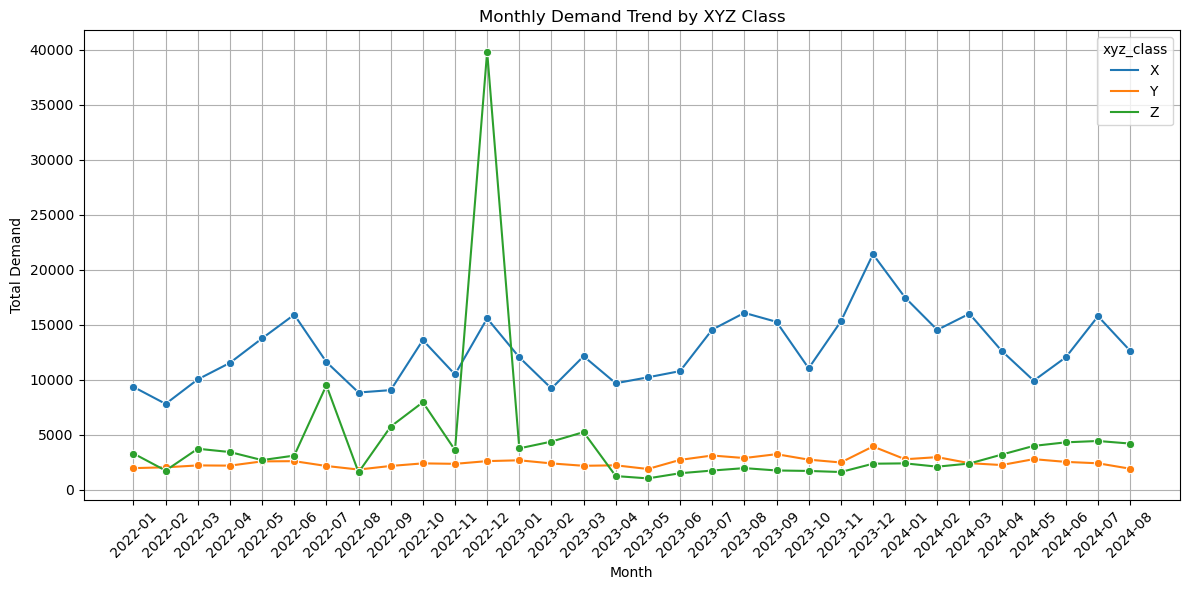

In [59]:
df_monthly_melted = df_monthly.melt(id_vars='xyz_class', var_name='Month', value_name='Total Demand')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_melted, x='Month', y='Total Demand', hue='xyz_class', marker='o')
plt.title('Monthly Demand Trend by XYZ Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# FSN Classification

FSN (Fast-moving, Slow-moving, Non-moving) classification is a critical inventory management technique used to categorize spare parts based on their consumption pattern over time.

In [60]:
fsn_data = final_data[['Part No', 'Part Desc', 'Sold Qty', 'Invoice Date']].copy()

In [61]:
# Step 2: Handle 'litres' — convert sold quantity to units if liquid part
pattern = r'L\)|L \)|LX|L-\d|-L \d|GMSX'
fsn_data['liquid_flag'] = fsn_data['Part Desc'].str.contains(pattern, regex=True).astype(int)
fsn_data['Sold Qty'] = np.where(fsn_data['liquid_flag'] == 1,
                                fsn_data['Sold Qty'] / 1000.0,
                                fsn_data['Sold Qty'].astype(float))

In [62]:
fsn_data['Invoice Date'] = pd.to_datetime(fsn_data['Invoice Date'])

In [63]:
fsn_agg = fsn_data.groupby('Part No').agg(
    total_qty=('Sold Qty', 'sum'),
    transaction_count=('Invoice Date', 'count'),
    last_invoice_date=('Invoice Date', 'max')
).reset_index()

In [64]:
fsn_agg

,Part No,total_qty,transaction_count,last_invoice_date
0,00SP1000870I,6.0000,6,2023-07-23
1,11071710400,13.0000,4,2024-06-05
2,11073510858,1.0000,1,2022-07-23
3,11073596094,1.0000,1,2022-07-23
4,11073710458,15.0000,7,2024-04-19
...,...,...,...,...
3780,K68370775AA,48.0000,40,2024-08-21
3781,K68370779AA,1.0000,1,2023-09-28
3782,K68381654AC,2.0000,2,2023-06-03
3783,K68535103AA,8.0000,8,2024-03-06


In [65]:
reference_date = fsn_data['Invoice Date'].max()
fsn_agg['recency_days'] = (reference_date - fsn_agg['last_invoice_date']).dt.days

In [66]:
fsn_agg

,Part No,total_qty,transaction_count,last_invoice_date,recency_days
0,00SP1000870I,6.0000,6,2023-07-23,404
1,11071710400,13.0000,4,2024-06-05,86
2,11073510858,1.0000,1,2022-07-23,769
3,11073596094,1.0000,1,2022-07-23,769
4,11073710458,15.0000,7,2024-04-19,133
...,...,...,...,...,...
3780,K68370775AA,48.0000,40,2024-08-21,9
3781,K68370779AA,1.0000,1,2023-09-28,337
3782,K68381654AC,2.0000,2,2023-06-03,454
3783,K68535103AA,8.0000,8,2024-03-06,177


In [67]:
def fsn_recency_classify(recency):
    if recency <= 30:
        return 'F'
    elif recency <= 180:
        return 'S'
    else:
        return 'N'

fsn_agg['FSN_Category'] = fsn_agg['recency_days'].apply(fsn_recency_classify)

In [68]:
fsn_agg

,Part No,total_qty,transaction_count,last_invoice_date,recency_days,FSN_Category
0,00SP1000870I,6.0000,6,2023-07-23,404,N
1,11071710400,13.0000,4,2024-06-05,86,S
2,11073510858,1.0000,1,2022-07-23,769,N
3,11073596094,1.0000,1,2022-07-23,769,N
4,11073710458,15.0000,7,2024-04-19,133,S
...,...,...,...,...,...,...
3780,K68370775AA,48.0000,40,2024-08-21,9,F
3781,K68370779AA,1.0000,1,2023-09-28,337,N
3782,K68381654AC,2.0000,2,2023-06-03,454,N
3783,K68535103AA,8.0000,8,2024-03-06,177,S


In [69]:
fsn_agg.FSN_Category.value_counts()

FSN_Category
N    1435
F    1186
S    1164
Name: count, dtype: int64

In [70]:
fsn_agg.groupby("FSN_Category")[["total_qty"]].sum()

,total_qty
FSN_Category,
F,492705.4880
N,86863.3210
S,47705.5840


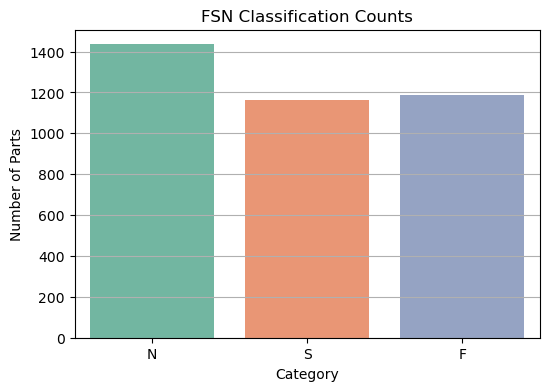

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(data=fsn_agg, x='FSN_Category', palette='Set2')
plt.title('FSN Classification Counts')
plt.xlabel('Category')
plt.ylabel('Number of Parts')
plt.grid(axis='y')
plt.show()


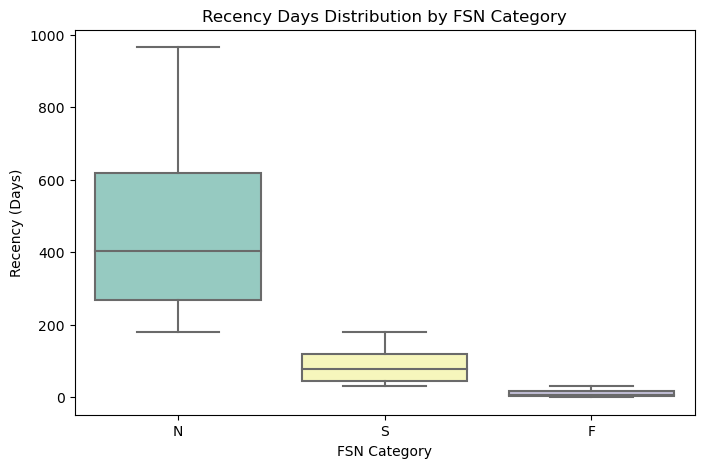

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=fsn_agg, x='FSN_Category', y='recency_days', palette='Set3')
plt.title('Recency Days Distribution by FSN Category')
plt.xlabel('FSN Category')
plt.ylabel('Recency (Days)')
plt.show()

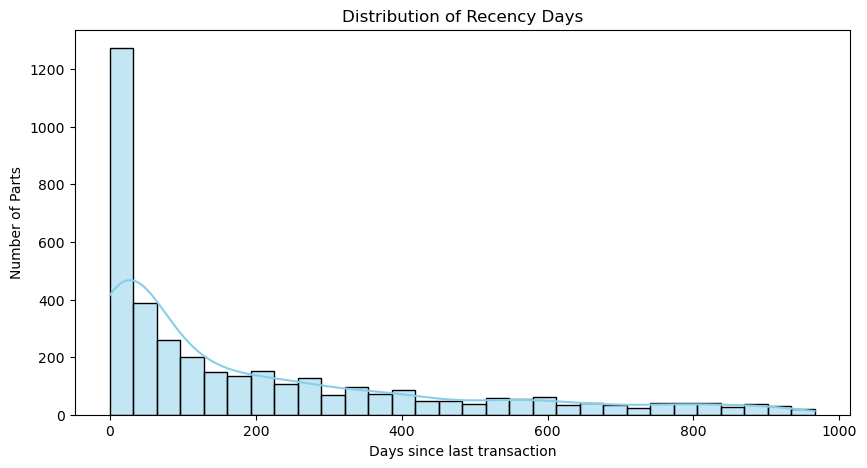

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(fsn_agg['recency_days'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Recency Days')
plt.xlabel('Days since last transaction')
plt.ylabel('Number of Parts')
plt.show()


# Segmentation Merging

In [75]:
abc_df = df_abc[['Part No', 'ABC_Class']]
xyz_df = xyz_pivot[['Part No', 'xyz_class']]
fsn_df = fsn_agg[['Part No', 'FSN_Category']]

In [76]:
# Merge all three
combined_df = abc_df.merge(xyz_df, on='Part No', how='outer')\
                    .merge(fsn_df, on='Part No', how='outer')

In [78]:
combined_df['Combined_Segment'] = combined_df['ABC_Class'].fillna('-') + \
                                   combined_df['FSN_Category'].fillna('-') + \
                                   combined_df['xyz_class'].fillna('-') 

In [79]:
combined_df

,Part No,ABC_Class,xyz_class,FSN_Category,Combined_Segment
0,8855COOL210S,A,X,S,ASX
1,8855AXLT0032,A,X,F,AFX
2,541242990154,A,X,F,AFX
3,8855AXLT0072,A,X,F,AFX
4,270240109986,A,X,F,AFX
...,...,...,...,...,...
3780,570220125301,C,Z,S,CSZ
3781,570718175302,C,Z,S,CSZ
3782,278920125310,C,Z,N,CNZ
3783,278920125306,C,Z,N,CNZ


In [80]:
metadata_df = final_data[['Part No', 'Part Desc', 'Category']].drop_duplicates()

liquid_pattern = r'L\)|L \)|LX|L-\d|-L \d|GMSX'
metadata_df['liquid_flag'] = metadata_df['Part Desc'].str.contains(liquid_pattern, regex=True).astype(int)

In [81]:
metadata_df

,Part No,Part Desc,Category,liquid_flag
0,287054509931,AILGATE_SWITCH,Spare Part,0
1,543854400158,"HEADLAMP ASSY WITH CELAR LENS,LH",Spare Part,0
2,543855106316,MASCOT,Spare Part,0
3,54387420010330,CED TAILGATE ASSY SHELL COMPLETE WITH WI,Spare Part,0
4,543874200124,"COVER ASSY,T/G PULL CUP WITH TOUCH PAD",Spare Part,0
...,...,...,...,...
235926,541242700128,"PARKING BRAKE CABLE ASSY,RH",Spare Part,0
235927,541242700129,"PARKING BRAKE CABLE ASSY,REAR-LH",Spare Part,0
236552,581627700114,GEAR SHIFTER ASSY,Spare Part,0
236769,543849200140,"EXHAUST PIPE ASSY,MIDDLE,FRONT",Spare Part,0


In [82]:
combined_df = combined_df.merge(metadata_df, on='Part No', how='left')

In [83]:
combined_df

,Part No,ABC_Class,xyz_class,FSN_Category,Combined_Segment,Part Desc,Category,liquid_flag
0,8855COOL210S,A,X,S,ASX,COOLANT PREMIX (40:60) L-210,Spare Part,1
1,8855AXLT0032,A,X,F,AFX,679S ULTRA PRODDUCTIVE CLEAR(5L),Nano Spares,1
2,541242990154,A,X,F,AFX,KIT-PAD ASSY,Spare Part,0
3,8855AXLT0072,A,X,F,AFX,AB150 BASE COAT BINDER(4L),Nano Spares,1
4,270240109986,A,X,F,AFX,ADHESIVE WEIGHT STRIP WITH ACRYLIC TAPE,Spare Part,0
...,...,...,...,...,...,...,...,...
3780,570220125301,C,Z,S,CSZ,"GASKET ,CYL. HEAD TO ADAPTOR ASSY.",Spare Part,0
3781,570718175302,C,Z,S,CSZ,GASKET(TC OIL RETURN TO BLOCK) - TALBROS,Spare Part,0
3782,278920125310,C,Z,N,CNZ,GASKET- UC LINE TO ELBOW,Spare Part,0
3783,278920125306,C,Z,N,CNZ,GASKET-ELBOW TO BYPASS PIPE,Spare Part,0


In [84]:
segment_counts = combined_df['Combined_Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
segment_counts

,Segment,Count
0,CNZ,1318
1,CSZ,849
2,CFZ,535
3,AFY,144
4,AFZ,132
5,BSZ,121
6,CFY,114
7,ASZ,114
8,BFZ,97
9,BFY,76


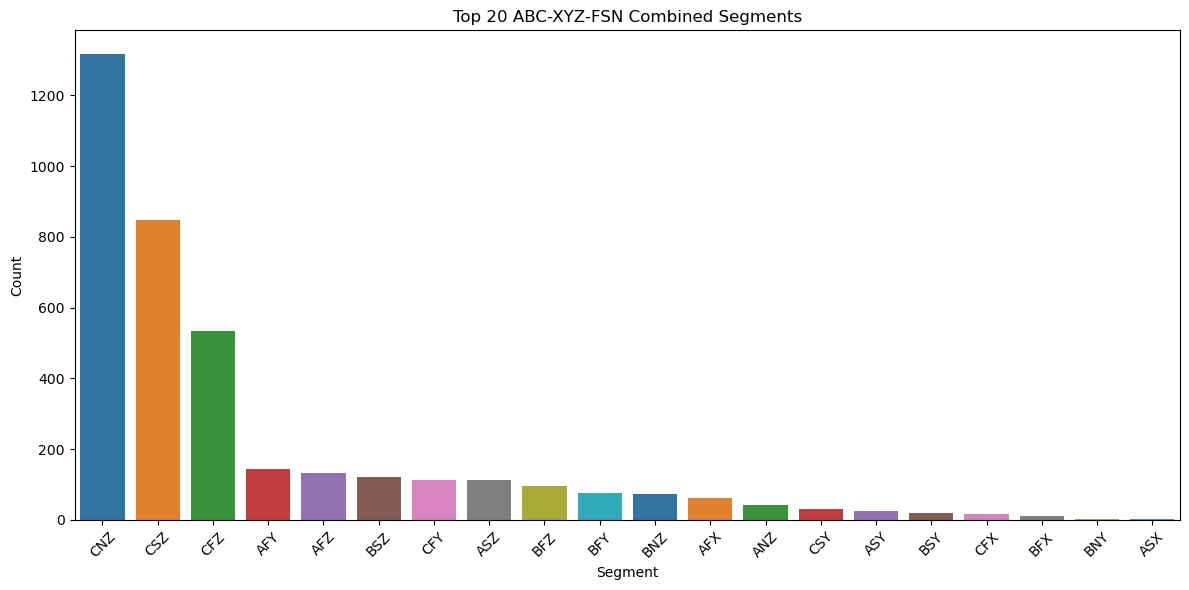

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=segment_counts.head(20), x='Segment', y='Count', palette='tab10')
plt.xticks(rotation=45)
plt.title("Top 20 ABC-XYZ-FSN Combined Segments")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


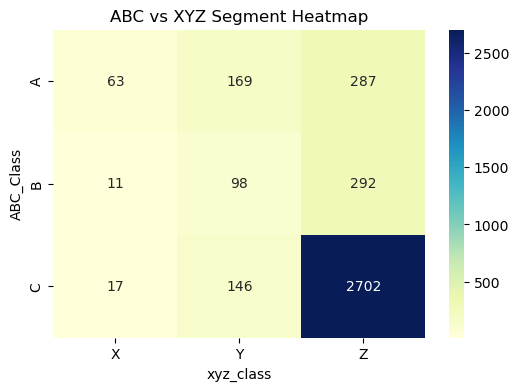

In [87]:
pivot_ax = combined_df.pivot_table(index='ABC_Class', columns='xyz_class', 
                                    values='Part No', aggfunc='count', fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_ax, annot=True, fmt='d', cmap='YlGnBu')
plt.title("ABC vs XYZ Segment Heatmap")
plt.show()


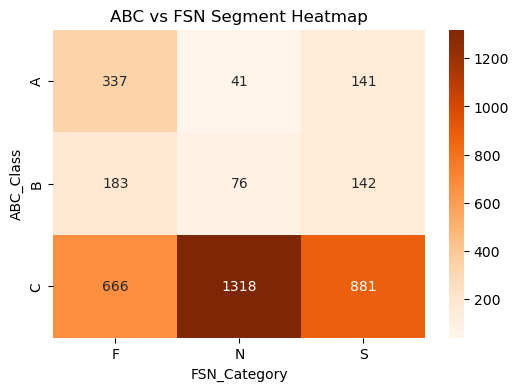

In [88]:
pivot_af = combined_df.pivot_table(index='ABC_Class', columns='FSN_Category', 
                                    values='Part No', aggfunc='count', fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_af, annot=True, fmt='d', cmap='Oranges')
plt.title("ABC vs FSN Segment Heatmap")
plt.show()


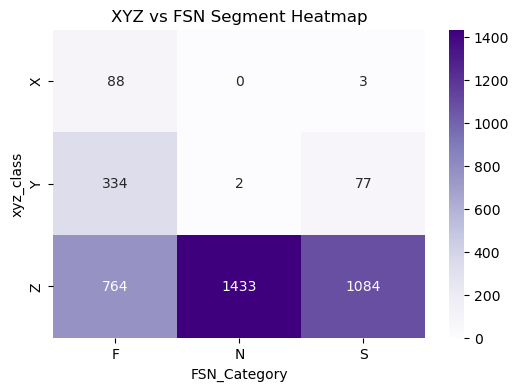

In [90]:
pivot_xf = combined_df.pivot_table(index='xyz_class', columns='FSN_Category', 
                                    values='Part No', aggfunc='count', fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_xf, annot=True, fmt='d', cmap='Purples')
plt.title("XYZ vs FSN Segment Heatmap")
plt.show()


# Next Objective :

Prioritize AFX,AFY,BFX,BFY segments for auto-replenishment.

Scrutinize CZN segments for obsolescence or liquidation.

Apply differentiated service levels by segment.

In [94]:
# Filter Rows where segment = AFX, AFY, AFZ, and BFX

filtered_segments=combined_df[combined_df['Combined_Segment'].isin(['AFX', 'AFY', 'AFZ', 'BFX'])]

In [95]:
filtered_segments

,Part No,ABC_Class,xyz_class,FSN_Category,Combined_Segment,Part Desc,Category,liquid_flag
1,8855AXLT0032,A,X,F,AFX,679S ULTRA PRODDUCTIVE CLEAR(5L),Nano Spares,1
2,541242990154,A,X,F,AFX,KIT-PAD ASSY,Spare Part,0
3,8855AXLT0072,A,X,F,AFX,AB150 BASE COAT BINDER(4L),Nano Spares,1
4,270240109986,A,X,F,AFX,ADHESIVE WEIGHT STRIP WITH ACRYLIC TAPE,Spare Part,0
5,584227000102,A,Z,F,AFZ,DUAL CLUTCH TRANSMISSION ASSY,Spare Part,0
...,...,...,...,...,...,...,...,...
653,570515209906,B,X,F,BFX,COOLANT TEMPERATURE SENSOR,Spare Part,0
690,287154509905,B,X,F,BFX,DOOR SWITCH ASSY WITH PIGTAIL,Spare Part,0
721,571501175801,B,X,F,BFX,HOSE BLOW-BY (CYL. HEAD TO AIR INTAKE),Spare Part,0
826,8855AXLT0093,B,X,F,BFX,AM17 FINE BRIGHT ALUMINUM(1L),Nano Spares,1


In [99]:
# export

filtered_segments.to_csv("filtered_segments.csv")

In [110]:
final_pivot_data_qty=xyz_monthly_agg.copy()

In [111]:
final_pivot_data=final_pivot_data_qty.pivot(index='Part No', columns='year_month', values='Sold Qty').fillna(0)

In [115]:
final_pivot_data=final_pivot_data.reset_index()

In [116]:
final_pivot_data

year_month,Part No,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,...,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08
0,00SP1000870I,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,11071710400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,4.0000,0.0000,0.0000
2,11073510858,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,11073596094,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,11073710458,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,K68370775AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,2.0000,3.0000,1.0000,1.0000,0.0000,0.0000,2.0000,5.0000,11.0000,7.0000
3781,K68370779AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3782,K68381654AC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3783,K68535103AA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [117]:
# export

final_pivot_data.to_csv("final_pivot_data.csv")